In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# ===============================================================
# 1. IMPORT LIBRARIES (KAGGLE SAFE)
# ===============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)

from sklearn.ensemble import IsolationForest

from sklearn.utils import resample   # <-- for oversampling (replacement)
from sklearn.utils import shuffle    # <-- mixing data

import warnings
warnings.filterwarnings("ignore")


In [5]:
# ===============================================================
# 2. LOAD DATA
# ===============================================================
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


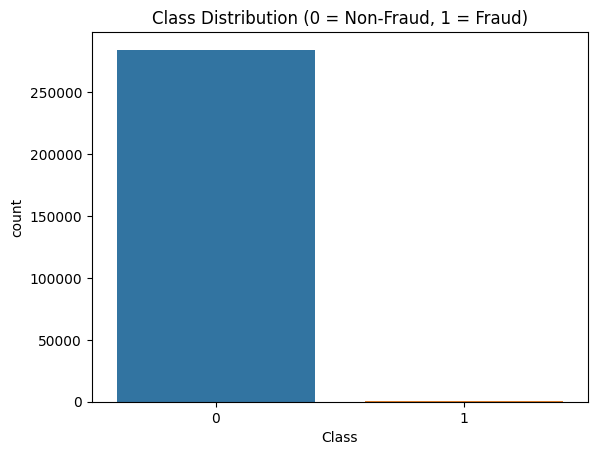

In [6]:
# ===============================================================
# 3. CHECK CLASS IMBALANCE
# ===============================================================
df['Class'].value_counts()

# Plot
sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()


In [7]:
# ===============================================================
# 4. SPLIT FEATURES & TARGET
# ===============================================================
X = df.drop("Class", axis=1)
y = df["Class"]

# Scale Amount & Time columns
scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])


In [8]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)
pred_prob = logreg.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, pred_prob))
print(classification_report(y_test, pred))


ROC-AUC: 0.956052141593835
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [4]:
sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

logreg_sm = LogisticRegression()
logreg_sm.fit(X_train_sm, y_train_sm)

pred_sm = logreg_sm.predict(X_test)
prob_sm = logreg_sm.predict_proba(X_test)[:, 1]

print("ROC-AUC with SMOTE:", roc_auc_score(y_test, prob_sm))
print(classification_report(y_test, pred_sm))


NameError: name 'SMOTE' is not defined

In [10]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

logreg_rus = LogisticRegression()
logreg_rus.fit(X_train_rus, y_train_rus)

pred_rus = logreg_rus.predict(X_test)
prob_rus = logreg_rus.predict_proba(X_test)[:, 1]

print("ROC-AUC with Undersampling:", roc_auc_score(y_test, prob_rus))
print(classification_report(y_test, pred_rus))


NameError: name 'RandomUnderSampler' is not defined

In [11]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

logreg_rus = LogisticRegression()
logreg_rus.fit(X_train_rus, y_train_rus)

pred_rus = logreg_rus.predict(X_test)
prob_rus = logreg_rus.predict_proba(X_test)[:, 1]

print("ROC-AUC with Undersampling:", roc_auc_score(y_test, prob_rus))
print(classification_report(y_test, pred_rus))


NameError: name 'RandomUnderSampler' is not defined

In [1]:
isolation = IsolationForest(
    n_estimators=200,
    contamination=0.0017,   # Approx fraud % in dataset
    random_state=42
)

iso_pred = isolation.fit_predict(X_test)

# Isolation Forest outputs: 1 = normal, -1 = fraud
iso_pred = np.where(iso_pred == -1, 1, 0)

print(classification_report(y_test, iso_pred))


NameError: name 'IsolationForest' is not defined